In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from api import *

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, matthews_corrcoef, mean_poisson_deviance

from sklearn.datasets import load_diabetes, load_iris, load_breast_cancer, make_classification
seed = 42

In [2]:
# data = load_diabetes()
# data = load_iris()
# data = load_breast_cancer()

# X, y = data.data, data.target
X, y = make_classification(5000, 12, n_classes=15, n_informative=7)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y, columns=['y'])], axis=1);df

,0,1,2,3,4,5,6,7,8,9,10,11,y
0,-0.918660,-0.082161,-0.653849,-0.979538,1.178687,-0.626096,0.618033,0.954513,-2.370786,-2.627790,-1.108907,1.572361,7
1,1.448309,0.199428,-1.376482,0.231849,-1.335388,-1.012568,0.966440,0.569317,-1.447029,-2.404461,1.103360,0.268891,6
2,2.361881,-2.891510,-1.736681,0.515567,-1.409149,-2.251702,-0.370926,0.123696,0.988692,1.199970,0.603155,-0.997673,10
3,0.122061,-1.107675,-1.727396,-0.759729,-0.251201,-0.293074,-0.695081,0.518566,1.938410,-1.233243,1.359861,0.945521,13
4,1.501885,1.329352,1.833576,2.447849,-0.002988,-3.044294,0.130978,0.644095,-0.117049,-0.223991,-2.298251,0.189324,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.545474,2.307116,-0.406047,-1.586770,-0.484037,2.411071,-0.519299,-0.358613,-0.472059,-1.069692,0.273913,-1.121545,11
4996,1.727676,4.143605,0.305863,-0.592057,-2.889283,-1.274616,1.239854,0.457130,1.185690,-2.089014,-0.329989,-0.372223,6
4997,-3.453394,0.759012,0.383661,-3.467573,-1.113330,-0.077158,-0.726390,-0.607461,-1.738802,-2.900932,2.637008,0.382161,1
4998,-1.422552,2.206286,2.693337,-1.351808,-0.216322,0.216985,-1.622808,-0.078710,2.078305,2.750944,-2.150097,-0.120885,3


In [3]:
inputs = list(range(X.shape[1]))[:7]
outputs = 'y'

# inputs = ['VPVS_RATIO', 'P_IMPEDANCE']
# outputs = 'PHI'

In [4]:
# X_train, X_test, y_train, y_test = getData(inputs, outputs, 'libra_l7_nw7_744_vsd_ml_bis.txt', 0.20, seed)
X_train, X_test, y_train, y_test = getData(inputs, outputs, df, 0.30, seed)
print(X_train)
print(y_test)

             0         1         2         3         4         5         6
1840  0.251787  1.753262  1.314703 -1.036215 -2.037038 -3.674518 -1.057310
2115 -0.520943 -3.202900  0.956039  1.725136  1.108473 -1.136925 -0.977584
4437 -2.334360 -2.283665 -0.163717 -1.915885  1.380630 -1.219637 -0.767814
1146 -1.849761 -0.788928  1.675223 -1.238923  0.197454  1.170269 -0.472781
2486  2.412182 -0.212410  0.315392  2.856499 -1.680591  0.340457  1.260335
...        ...       ...       ...       ...       ...       ...       ...
4426 -0.097578 -8.009937 -0.577866  0.773479  1.265845 -4.953428 -0.023725
466  -2.195094  1.695649  0.413231 -2.308929 -0.693354 -1.120799 -0.607814
3092  0.073929  0.644510  0.230108 -1.192003 -0.080563 -1.588433 -0.689048
3772  0.450120  3.089930  1.685715  0.901111  0.089350 -1.205892  0.833856
860   1.070230  1.088540 -1.208034 -1.330935 -1.133651  3.425481 -2.022715

[3500 rows x 7 columns]
1501    13
2586     7
2653     0
1055     0
705     11
        ..
3563    1

## Création modèle + entrainement

In [5]:
parameters={'random_state': 42, 'n_jobs': -1, 'n_estimators': 30, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 5, 
 'min_samples_leaf': 8, 'max_depth': 7, 'criterion': 'entropy'}

parameters=dict(zip(['n_estimators', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state'], 
                    [40, 4, 0.2641977699019971, 42]))

In [6]:
# model = Model(RandomForestRegressor, X_train, X_test, y_train, y_test, parameters={'random_state': seed})
model = Model(RandomForestClassifier, X_train, X_test, y_train, y_test, parameters={'random_state': seed})
# model = Model(RandomForestClassifier, X_train, X_test, y_train, y_test, parameters=parameters)
# model = Model(LinearSVC, X_train, X_test, y_train, y_test, parameters={'max_iter': 5000})

In [7]:
model.fit()

In [8]:
model.predict({accuracy_score: {}, confusion_matrix: {}})#, recall_score: {'average': 'macro'}})
# model.predict(metrics={r2_score: {}, mean_squared_error: {}, explained_variance_score: {}})

## Inférence

In [9]:
X_pred = X_test.iloc[:50,:]

In [10]:
prediction(model.name, X_pred=X_pred)

## Opti Bayes

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1485
Function value obtained: -0.2147
Current minimum: -0.2147
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0727
Function value obtained: -0.2967
Current minimum: -0.2967
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.8600
Function value obtained: -0.1907
Current minimum: -0.2967
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 2.0490
Function value obtained: -0.3207
Current minimum: -0.3207
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 2.2069
Function value obtained: -0.3107
Current minimum: -0.3207
I

([40, 2, 0.0, 42], 0.3486666666666667, 11.88767)

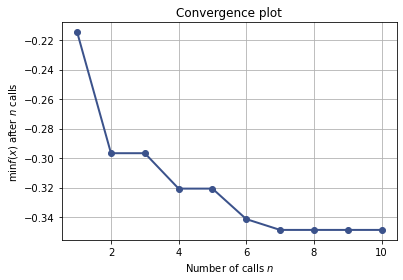

In [12]:
parameters = {'n_estimators': [10, 20, 30, 40], 'min_samples_split': [2,4,6,8,10], 
              'min_weight_fraction_leaf': (0., 0.5), 'random_state': [seed], }  # rf

# parameters = {'penalty': ['l1', 'l2'], 'C': (0.01, 3), 'intercept_scaling': (0.2, 2), 
#               'max_iter': [5000], 'random_state': [seed], 'dual': [False]}  # svm

# model.optimize(parameters_range=parameters, n_lhs=5, n_calls=10, metric={r2_score: {}}, min_or_max='max', refit=True)
model.optimize(parameters_range=parameters, n_lhs=3, n_calls=10, metric={accuracy_score: {}}, min_or_max='max', 
               refit=True, plot_cvg=True)

# RandomSearch vs LHS

In [ ]:
# assert(False)

``` python
parameters = {'n_estimators': list(range(10, 71, 20)), 'criterion': ['poisson'] or ['gini', 'entropy'], 
              'max_depth': [None] + list(range(1, 15, 1)), 'min_samples_split': list(range(2, 11, 1)), 
              'min_samples_leaf': list(range(1, 11, 1)), 'min_weight_fraction_leaf': list(np.linspace(0., 0.5, 10)), 
              'random_state': [seed], 'n_jobs': [-1]}  # rf
```
54000 combinaisons  
30 pts choisis  
100 répétitions

#### RandomizedSearchCV vs LHS :  
**Regression**  
*Temps moyens :*   
np.mean(times_rscv) = 1.127 s  
np.mean(times_lhs) = 9.966 s  
np.mean(times_gp) = 11.012 s

*Scores moyens (r2) :*  
np.mean(best_scores_rscv) = 0.415  
np.mean(best_scores_lhs) = 0.435  
np.mean(best_scores_gp) = 0.460

**Classification**  
*Temps moyens :*   
np.mean(times_rscv) =  
np.mean(times_lhs) =  
np.mean(times_gp) =  

*Scores moyens :*  
np.mean(best_scores_rscv) =  
np.mean(best_scores_lhs) =  
np.mean(best_scores_gp) =  

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from time import time
from sklearn.metrics import make_scorer

# import warnings
# warnings.filterwarnings('ignore')

In [87]:
# 4*2*15*9*10*10*1*1 = 108000
parameters = {'n_estimators': list(range(10, 71, 20)), 'criterion': ['gini', 'entropy'], 
              'max_depth': [None] + list(range(1, 15, 1)), 'min_samples_split': list(range(2, 11, 1)), 
              'min_samples_leaf': list(range(1, 11, 1)), 'min_weight_fraction_leaf': list(np.linspace(0., 0.5, 10)), 
              'random_state': [seed], 'n_jobs': [-1]}  # rf

In [88]:
%%time
n_pts = 20
n_exp = 30
best_scores_rscv = []
best_scores_lhs = []
best_scores_gp = []
times_rscv = []
times_lhs = []
times_gp = []

# rf = RandomForestRegressor()
rf = RandomForestClassifier()
for i in range (n_exp):
    # RandomizedSearchCV
    clf = RandomizedSearchCV(estimator=rf, param_distributions=parameters, cv=2, n_jobs=-1, 
                             n_iter=n_pts, scoring=make_scorer(accuracy_score))
    t0 = time()
    search = clf.fit(X, y)
    times_rscv.append(time() - t0)
    best_scores_rscv.append(pd.DataFrame(search.cv_results_['mean_test_score']).max()[0])
#     print(search.best_params_)

    # LHS
    model = Model(RandomForestClassifier, X_train, X_test, y_train, y_test)
    _, best_score_lhs, time_lhs = model.optimize(parameters_range=parameters, n_lhs=n_pts, n_calls=n_pts, 
                                   metric={accuracy_score: {}}, min_or_max='max', verbose=False, write=False)
    times_lhs.append(time_lhs)
    best_scores_lhs.append(best_score_lhs)
    
    # gp_minimize + EGO
    model = Model(RandomForestClassifier, X_train, X_test, y_train, y_test)
    _, best_score_gp, time_gp = model.optimize(parameters_range=parameters, n_lhs=(n_pts//2), n_calls=n_pts, 
                                       metric={accuracy_score: {}}, min_or_max='max', verbose=False, write=False)
    times_gp.append(time_gp)
    best_scores_gp.append(best_score_gp)

/data/appli_PITSI/users/targe/miniconda3/envs/dev/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/data/appli_PITSI/users/targe/miniconda3/envs/dev/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


CPU times: user 36min 46s, sys: 3min 53s, total: 40min 40s
Wall time: 15min 44s


In [89]:
# pd.DataFrame(search.cv_results_)

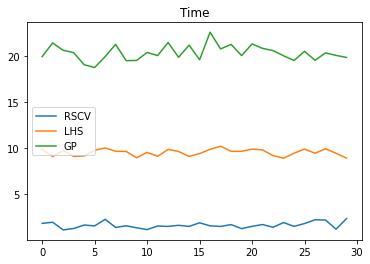

In [90]:
plt.plot(times_rscv)
plt.plot(times_lhs)
plt.plot(times_gp)
plt.title('Time')
plt.legend(['RSCV', 'LHS', 'GP']);

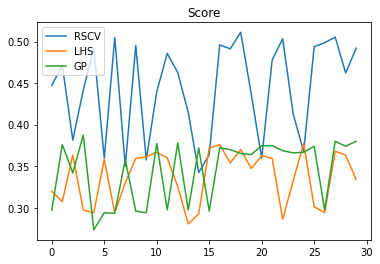

In [91]:
plt.plot(best_scores_rscv)
plt.plot(best_scores_lhs)
plt.plot(best_scores_gp)
plt.title('Score')
plt.legend(['RSCV', 'LHS', 'GP']);